In [45]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
%cd '/content/drive/MyDrive/MLOM Labs/Cat&Dog Dataset'

/content/drive/MyDrive/MLOM Labs/Cat&Dog Dataset


In [36]:
pip install tensorflow

In [46]:
import tensorflow as tf


In [38]:
#acquire data
train_path = 'Training_data'
valid_path = 'Testing_data'

In [39]:
model = tf.keras.models.Sequential([
# Note the input shape is the desired size of the image 300x300 with 3 bytes color
# This is the first convolution
tf.keras.layers.Conv2D (filters=16, kernel_size=3, activation='relu', input_shape=(300, 300, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
# The second convolution
tf.keras.layers.Conv2D (filters=16, kernel_size=3, activation='relu'),
tf.keras.layers. MaxPooling2D(pool_size=2),
# The third convolution
tf.keras.layers.Conv2D (filters=32, kernel_size=3, activation='relu'),
tf.keras.layers. MaxPooling2D(pool_size=2),
# The fourth convolution
tf.keras.layers.Conv2D (filters=64, kernel_size=3, activation='relu'),
tf.keras.layers. MaxPooling2D(pool_size=2),
# The fifth convolution
tf.keras.layers.Conv2D (filters=64, kernel_size=3, activation='relu'),
tf.keras.layers. MaxPooling2D(pool_size=2),
# Flatten the results to feed into a DNN
tf.keras.layers. Flatten(),
# 512 neuron hidden layer
tf.keras.layers. Dense (512, activation='relu'),
# Only 1 output neuron. It will contain a value from 0-1 where @ for 1 class ('Cat') and 1 for the other ('Dog')
tf.keras.layers. Dense (1, activation='sigmoid')
])

In [40]:
#model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 147, 147, 16)      2320      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 73, 73, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 35, 35, 32)      

In [41]:
#compile the model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [42]:
#train the model from generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All train images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_path, # This is the source directory for training images
                                                    target_size = (300, 300), #All images will be resized to 150*150
                                                    batch_size = 32,
                                                    #since we use binary_crossentropy loss, we need binary labels
                                                    class_mode = 'binary')

#All test images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale = 1./255)

#apply predefined specification to test dataset
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (300 , 300),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 633 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [48]:
#training the model
history = model.fit(
    train_generator,
    validation_data = test_set,
    steps_per_epoch = 8,
    epochs = 2
)

Epoch 1/2
8/8 [==============================] - 156s 21s/step - loss: 0.8319 - accuracy: 0.5904 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/2
8/8 [==============================] - 43s 5s/step - loss: 0.6777 - accuracy: 0.6133 - val_loss: 0.6979 - val_accuracy: 0.5000


In [43]:
#save weights for future prediction

model.save_weights('first_try.h5')
model.load_weights('first_try.h5')

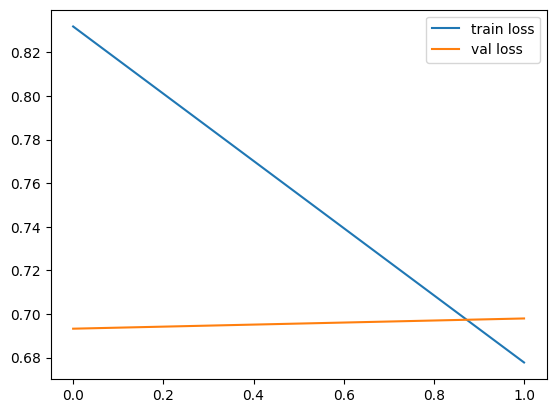

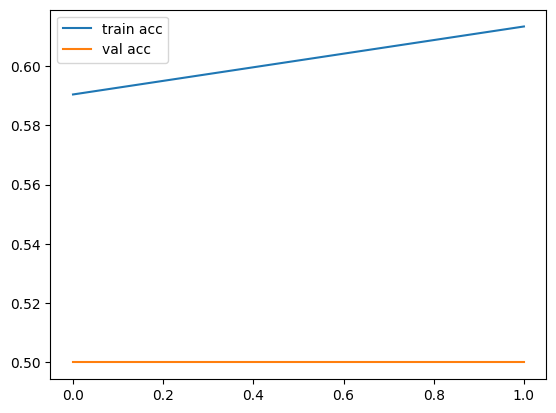

<Figure size 640x480 with 0 Axes>

In [49]:
#. Plot variation in loss and accuracy

import matplotlib.pyplot as plt
#Plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend ()
plt.show()
plt.savefig('LossVal_loss')

#Plot the accuracy
plt.plot (history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend ()
plt.show()
plt.savefig('AccVal acc')